In [27]:
# Zadanie 1 - pobierz zbiór i podziel
import pandas as pd

X_train = pd.read_csv("Train\X_train.txt")
X_train = X_train.iloc[:,0].str.split(' ', expand=True)
X_train = X_train.astype(float)
X_test = pd.read_csv("Test\X_test.txt")
X_test = X_test.iloc[:,0].str.split(' ', expand=True)
X_test = X_test.astype(float)
y_train = pd.read_csv("Train\y_train.txt")
y_train = y_train.astype(int)
#y_train = y_train.iloc[:,0].str.split(' ', expand=True)

y_test = pd.read_csv("Test\y_test.txt")
y_test = y_test.astype(int)
#y_test = y_test.iloc[:, 0].str.split(' ', expand=True)

In [28]:
X_train.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
556    float64
557    float64
558    float64
559    float64
560    float64
Length: 561, dtype: object

In [56]:
print("Uczenie modeli...")
models = list()

from sklearn import svm

SVM = svm.SVC(probability=True)
SVM.fit(X_train, y_train)
models.append(SVM)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train.iloc[:, 0])
models.append(knn)

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
models.append(decision_tree)

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.iloc[:, 0])
models.append(random_forest)

model_names = ["SVM","kNN","Drzewo decyzyjne", "Losowy las decyzyjny"]
print("Modele wyuczone i dodane do listy")

Uczenie modeli...


c:\users\kucht\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-56-a159f553058f>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-56-a159f553058f>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Modele wyuczone i dodane do listy


In [47]:
import numpy as np
def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = []
    
    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))

        counts_list.append({'Class': i,
                            'TP': tp,
                            'FN': fn,
                            'FP': fp,
                            'TN': tn})

    return counts_list

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc, roc_curve


# create one-hot
encoded_features = pd.get_dummies(y_test.iloc[:, 0])

for clf, name in zip(models, model_names):
    print("============"+name+"===========")
    print("Wyniki confousius matrix dla klasyfikatora ",name,": ")
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)
    fpr = {}
    tpr = {}
    thresh ={}
    n_class = len(y_train.iloc[:, 0].unique())
    result = counts_from_confusion(confusion_matrix(y_test, y_pred))
    for cl in result:
        print("Confusion matrix dla klasy",cl['Class'],":")
        print("TP:",cl['TP'],"\nFN:",cl['FN'],"\nFP:",cl['FP'],"\nTN:",cl["TN"])
    acc = accuracy_score(y_test, y_pred)
    print("ACC =",acc)
    recall = recall_score(y_test, y_pred, average='macro')
    print("Recall =", recall)
    f1 = f1_score(y_test, y_pred, average='macro')
    print("F! =",f1)
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
        auc_score = roc_auc_score(encoded_features.iloc[:,i], y_pred_proba[:,i],multi_class='ovr', average='macro')
        print("AUC dla klasy ",cl[i],":", auc_score)

============SVM===========
Wyniki confousius matrix dla klasyfikatora  SVM : 
Confusion matrix dla klasy 0 :
TP: 489 
FN: 7.0 
FP: 34.0 
TN: 2631.0
Confusion matrix dla klasy 1 :
TP: 449 
FN: 22.0 
FP: 37.0 
TN: 2653.0
Confusion matrix dla klasy 2 :
TP: 384 
FN: 36.0 
FP: 3.0 
TN: 2738.0
Confusion matrix dla klasy 3 :
TP: 454 
FN: 54.0 
FP: 33.0 
TN: 2620.0
Confusion matrix dla klasy 4 :
TP: 526 
FN: 29.0 
FP: 51.0 
TN: 2555.0
Confusion matrix dla klasy 5 :
TP: 545 
FN: 0.0 
FP: 2.0 
TN: 2614.0
Confusion matrix dla klasy 6 :
TP: 18 
FN: 5.0 
FP: 3.0 
TN: 3135.0
Confusion matrix dla klasy 7 :
TP: 8 
FN: 2.0 
FP: 0.0 
TN: 3151.0
Confusion matrix dla klasy 8 :
TP: 28 
FN: 4.0 
FP: 16.0 
TN: 3113.0
Confusion matrix dla klasy 9 :
TP: 18 
FN: 7.0 
FP: 9.0 
TN: 3127.0
Confusion matrix dla klasy 10 :
TP: 27 
FN: 22.0 
FP: 6.0 
TN: 3106.0
Confusion matrix dla klasy 11 :
TP: 15 
FN: 12.0 
FP: 6.0 
TN: 3128.0
ACC = 0.9367288832647896
Recall = 0.8315914063390456
F! = 0.8424669474081591
AUC dla kla

c:\users\kucht\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


Confusion matrix dla klasy 0 :
TP: 486 
FN: 10.0 
FP: 86.0 
TN: 2579.0
Confusion matrix dla klasy 1 :
TP: 423 
FN: 48.0 
FP: 66.0 
TN: 2624.0
Confusion matrix dla klasy 2 :
TP: 327 
FN: 93.0 
FP: 18.0 
TN: 2723.0
Confusion matrix dla klasy 3 :
TP: 398 
FN: 110.0 
FP: 45.0 
TN: 2608.0
Confusion matrix dla klasy 4 :
TP: 511 
FN: 44.0 
FP: 108.0 
TN: 2498.0
Confusion matrix dla klasy 5 :
TP: 541 
FN: 4.0 
FP: 1.0 
TN: 2615.0
Confusion matrix dla klasy 6 :
TP: 17 
FN: 6.0 
FP: 2.0 
TN: 3136.0
Confusion matrix dla klasy 7 :
TP: 10 
FN: 0.0 
FP: 0.0 
TN: 3151.0
Confusion matrix dla klasy 8 :
TP: 28 
FN: 4.0 
FP: 18.0 
TN: 3111.0
Confusion matrix dla klasy 9 :
TP: 22 
FN: 3.0 
FP: 12.0 
TN: 3124.0
Confusion matrix dla klasy 10 :
TP: 23 
FN: 26.0 
FP: 6.0 
TN: 3106.0
Confusion matrix dla klasy 11 :
TP: 11 
FN: 16.0 
FP: 2.0 
TN: 3132.0
ACC = 0.8848465675419172
Recall = 0.8103558954686664
F! = 0.8135154260215202
AUC dla klasy  11 : 0.989062972825758
AUC dla klasy  11 : 0.9845886707866677
AUC dl

c:\users\kucht\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


Confusion matrix dla klasy 0 :
TP: 371 
FN: 125.0 
FP: 86.0 
TN: 2579.0
Confusion matrix dla klasy 1 :
TP: 360 
FN: 111.0 
FP: 193.0 
TN: 2497.0
Confusion matrix dla klasy 2 :
TP: 308 
FN: 112.0 
FP: 65.0 
TN: 2676.0
Confusion matrix dla klasy 3 :
TP: 406 
FN: 102.0 
FP: 89.0 
TN: 2564.0
Confusion matrix dla klasy 4 :
TP: 465 
FN: 90.0 
FP: 101.0 
TN: 2505.0
Confusion matrix dla klasy 5 :
TP: 540 
FN: 5.0 
FP: 3.0 
TN: 2613.0
Confusion matrix dla klasy 6 :
TP: 17 
FN: 6.0 
FP: 12.0 
TN: 3126.0
Confusion matrix dla klasy 7 :
TP: 8 
FN: 2.0 
FP: 1.0 
TN: 3150.0
Confusion matrix dla klasy 8 :
TP: 16 
FN: 16.0 
FP: 11.0 
TN: 3118.0
Confusion matrix dla klasy 9 :
TP: 15 
FN: 10.0 
FP: 11.0 
TN: 3125.0
Confusion matrix dla klasy 10 :
TP: 31 
FN: 18.0 
FP: 29.0 
TN: 3083.0
Confusion matrix dla klasy 11 :
TP: 12 
FN: 15.0 
FP: 11.0 
TN: 3123.0
ACC = 0.8063903827902562
Recall = 0.7158127066066776
F! = 0.7138097981902195
AUC dla klasy  11 : 0.8578568510561037
AUC dla klasy  11 : 0.84629199914758

c:\users\kucht\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


Confusion matrix dla klasy 0 :
TP: 484 
FN: 12.0 
FP: 66.0 
TN: 2599.0
Confusion matrix dla klasy 1 :
TP: 422 
FN: 49.0 
FP: 49.0 
TN: 2641.0
Confusion matrix dla klasy 2 :
TP: 356 
FN: 64.0 
FP: 16.0 
TN: 2725.0
Confusion matrix dla klasy 3 :
TP: 446 
FN: 62.0 
FP: 47.0 
TN: 2606.0
Confusion matrix dla klasy 4 :
TP: 511 
FN: 44.0 
FP: 60.0 
TN: 2546.0
Confusion matrix dla klasy 5 :
TP: 544 
FN: 1.0 
FP: 0.0 
TN: 2616.0
Confusion matrix dla klasy 6 :
TP: 18 
FN: 5.0 
FP: 5.0 
TN: 3133.0
Confusion matrix dla klasy 7 :
TP: 8 
FN: 2.0 
FP: 2.0 
TN: 3149.0
Confusion matrix dla klasy 8 :
TP: 22 
FN: 10.0 
FP: 16.0 
TN: 3113.0
Confusion matrix dla klasy 9 :
TP: 19 
FN: 6.0 
FP: 12.0 
TN: 3124.0
Confusion matrix dla klasy 10 :
TP: 27 
FN: 22.0 
FP: 14.0 
TN: 3098.0
Confusion matrix dla klasy 11 :
TP: 13 
FN: 14.0 
FP: 4.0 
TN: 3130.0
ACC = 0.9079405251502689
Recall = 0.7982367273744811
F! = 0.7999062546353177
AUC dla klasy  11 : 0.9976404103371059
AUC dla klasy  11 : 0.9908479940646729
AUC dl

c:\users\kucht\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


In [98]:
# Zadanie 3 - kross validacja, wybor najlepszego klasyfikatora
from sklearn.model_selection import cross_val_score
for clf, name in zip(models, model_names):
    scores = cross_val_score(clf, X_test, y_test.iloc[:, 0], cv=5)
    print("Średni wynik dla klasyfikatora",name,end='')
    print(" to %0.2f z odchyleniem standardowym %0.2f" % (scores.mean(), scores.std() * 2))

Średni wynik dla klasyfikatora SVM to 0.91 z odchyleniem standardowym 0.07
Średni wynik dla klasyfikatora kNN to 0.85 z odchyleniem standardowym 0.06
Średni wynik dla klasyfikatora Drzewo decyzyjne to 0.79 z odchyleniem standardowym 0.09
Średni wynik dla klasyfikatora Losowy las decyzyjny to 0.88 z odchyleniem standardowym 0.08


In [105]:
# Zadanie 4 - znajdowanie optimum
# knn - liczba sąsiadów
error_rate = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.iloc[:, 0])
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test.iloc[:, 0]))
    print(k,"/50")
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Liczba sąsiadów')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

1 /50
2 /50
3 /50
4 /50
5 /50
6 /50
7 /50
8 /50
9 /50
10 /50
11 /50
12 /50
13 /50
14 /50
15 /50
16 /50
17 /50
18 /50
19 /50
20 /50
21 /50
22 /50
23 /50
24 /50
25 /50
26 /50
27 /50
28 /50
29 /50
30 /50
31 /50
32 /50
33 /50
34 /50
35 /50
36 /50
37 /50
38 /50
39 /50
40 /50
41 /50
42 /50
43 /50
44 /50
45 /50
46 /50
47 /50
48 /50
49 /50


NameError: name 'plt' is not defined

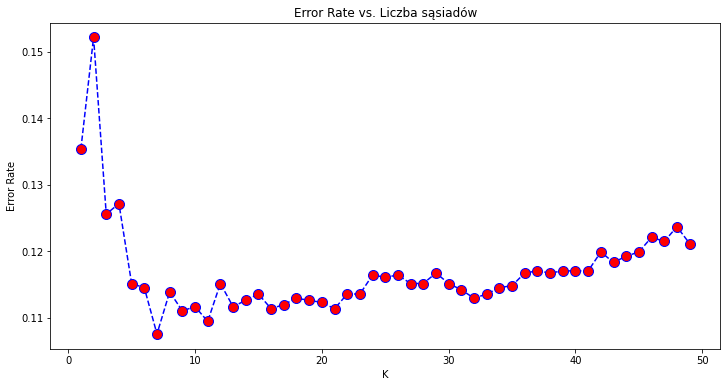

In [106]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Liczba sąsiadów')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [110]:
# SVM
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score, verbose=1, n_jobs=-1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    print("Najlepsze parametry dla ",score,": ",clf.best_params_)

# Tuning hyper-parameters for precision

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 66.5min finished
c:\users\kucht\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best parameters set found on development set:

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.066 (+/-0.034) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.015 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.015 (+/-0.000) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.015 (+/-0.000) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.521 (+/-0.015) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.409 (+/-0.019) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.057 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.015 (+/-0.000) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.521 (+/-0.015) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.409 (+/-0.019) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.057 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.015 (+/-0.000) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.874 (+/-0.038) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.864 (+/-0.026) for {'C':

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 52.3min finished
c:\users\kucht\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best parameters set found on development set:

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.101 (+/-0.018) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.083 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.083 (+/-0.000) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.083 (+/-0.000) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.555 (+/-0.038) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.385 (+/-0.017) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.083 (+/-0.000) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.555 (+/-0.038) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.385 (+/-0.017) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.083 (+/-0.000) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.859 (+/-0.054) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.833 (+/-0.052) for {'C':

In [111]:
# Decision Tree
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, n_jobs=-1, verbose=3)

# Fit it to the data
tree_cv.fit(X_train,y_train.iloc[:, 0])

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5}
Best score is 0.7709239641628567


Trenowanie modelu lasu dla  5 drzew
Trenowanie modelu lasu dla  10 drzew
Trenowanie modelu lasu dla  15 drzew
Trenowanie modelu lasu dla  20 drzew
Trenowanie modelu lasu dla  25 drzew
Trenowanie modelu lasu dla  30 drzew
Trenowanie modelu lasu dla  40 drzew
Trenowanie modelu lasu dla  50 drzew
Trenowanie modelu lasu dla  64 drzew
Trenowanie modelu lasu dla  70 drzew
Trenowanie modelu lasu dla  100 drzew
Trenowanie modelu lasu dla  128 drzew


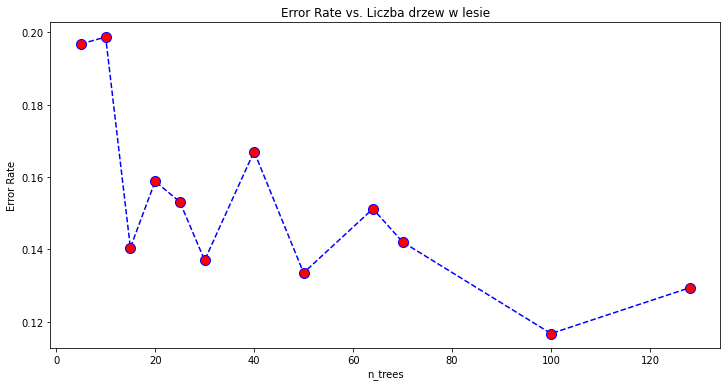

In [206]:
#Random forest
error_rates = []
trees = [5,10,15,20,25,30,40,50,64,70,100,128]
for n in trees:
    print("Trenowanie modelu lasu dla ",n,"drzew")
    rand_for = RandomForestClassifier(n_estimators=n)
    rand_for.fit(X_train, y_train.iloc[:, 0])
    predictions = rand_for.predict(X_test)
    error_rates.append(np.mean(predictions != y_test.iloc[:, 0]))
    
plt.figure(figsize=(12,6))
plt.plot(trees,error_rates,color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Liczba drzew w lesie')
plt.xlabel('n_trees')
plt.ylabel('Error Rate')
plt.show()

<ipython-input-75-6fe639468cd8>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[:, :2], y_train)


Przygotowania do tworzenia wykresu...
Tworzenie wykresu dla klasy nr  1
Tworzenie wykresu dla klasy nr  2
Tworzenie wykresu dla klasy nr  3
Tworzenie wykresu dla klasy nr  4
Tworzenie wykresu dla klasy nr  5
Tworzenie wykresu dla klasy nr  6
Tworzenie wykresu dla klasy nr  7
Tworzenie wykresu dla klasy nr  8
Tworzenie wykresu dla klasy nr  9
Tworzenie wykresu dla klasy nr  10
Tworzenie wykresu dla klasy nr  11
Tworzenie wykresu dla klasy nr  12
Koniec pętli


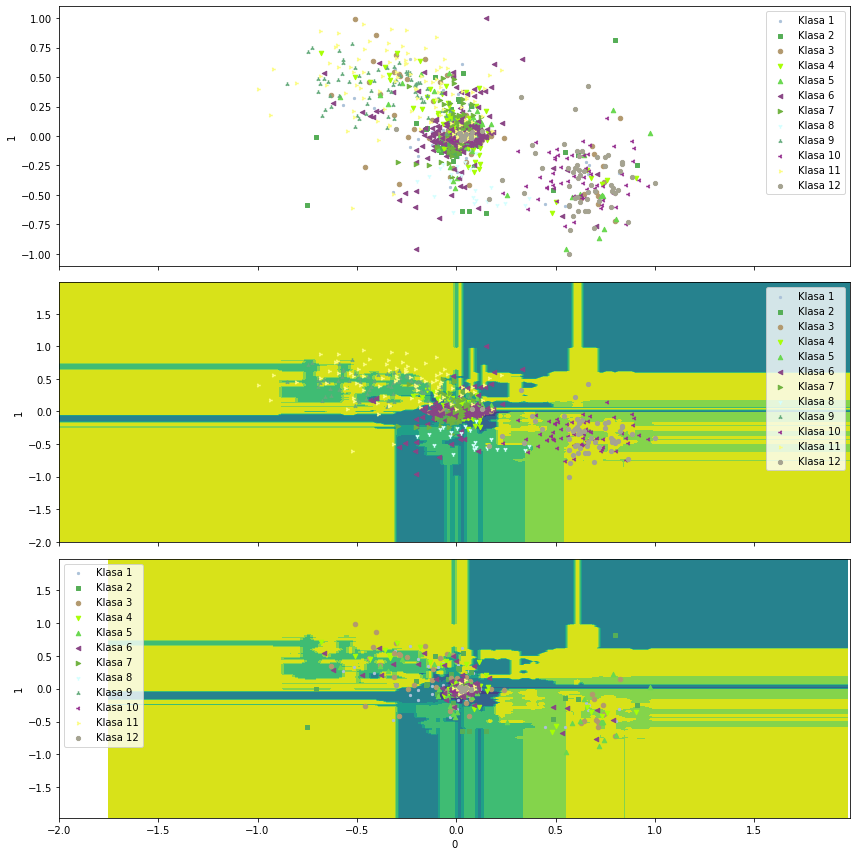

In [75]:
# Zadanie 5 
import matplotlib.markers as markers
import matplotlib.colors as colors
from sklearn.ensemble import RandomForestClassifier
import numpy as np
n_classes = 12
n_trees = 100
plot_step = 0.02

clf = RandomForestClassifier(n_estimators=n_trees)
clf.fit(X_train.iloc[:, :2], y_train)


print("Przygotowania do tworzenia wykresu...")
mrks = list(markers.MarkerStyle.markers.keys())[0:n_classes]
clrs = list(colors.XKCD_COLORS.keys())
y_test.columns = ['Class']
y_train.columns = ['Class']
train_dataset = ""
test_dataset =""
train_dataset = X_train
train_dataset['Class'] = pd.Series(y_train.values.tolist())
train_dataset['Class'] = [','.join(map(str, l)) for l in train_dataset['Class']]
#train_dataset['Class'] = train_dataset['Class'].str.replace(']','')
test_dataset = X_test
test_dataset['Class'] = pd.Series(y_train.values.tolist())
test_dataset['Class'] = [','.join(map(str, l)) for l in test_dataset['Class']]
train_dataset['Class'] = pd.to_numeric(train_dataset['Class'])
test_dataset['Class'] = pd.to_numeric(test_dataset['Class'])

x_min, x_max = float(X_train.iloc[:, 0].min()) - 1, float(X_train.iloc[:, 0].max()) + 1
y_min, y_max = float(X_train.iloc[:, 1].min()) - 1, float(X_train.iloc[:, 1].max()) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(12,12))
axes[1].contourf(xx, yy, Z)

x_min, x_max = float(X_test.iloc[:, 0].min()) - 1, float(X_test.iloc[:, 0].max()) + 1
y_min, y_max = float(X_test.iloc[:, 1].min()) - 1, float(X_test.iloc[:, 1].max()) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[2].contourf(xx, yy, Z)
for i in range(1,n_classes + 1):
    print("Tworzenie wykresu dla klasy nr ",i)
    # wykres probek z podzialem na klase
    sliced_train = train_dataset.loc[train_dataset.Class == i]
    sliced_test = test_dataset.loc[test_dataset.Class == i]
    sliced_train.plot(x=0,y=1, ax=axes[0], kind='scatter', marker=mrks[i-1], c=clrs[i-1], label="Klasa "+str(i))
    sliced_test.plot(x=0,y=1, ax=axes[0], kind='scatter', marker=mrks[i-1], c=clrs[i-1])
    sliced_train.plot(x=0,y=1, ax=axes[1], kind='scatter', marker=mrks[i-1], c=clrs[i-1], label="Klasa "+str(i),zorder=1)
    sliced_test.plot(x=0,y=1, ax=axes[2], kind='scatter', marker=mrks[i-1], c=clrs[i-1], label="Klasa "+str(i),zorder=1)

print("Koniec pętli")

plt.legend(loc='upper left');
plt.tight_layout()
plt.show()